<div>
    <img src="banner.webp" style="width: 800px; height: 200px"/>
</div>


## Enabling Line Numbers and Table of Contents in Jupyter Notebook  
To enhance readability and navigation in your Jupyter Notebook, follow the instructions below to enable **line numbers** and a **Table of Contents**:

---

### **1. Enabling Line Numbers**
Line numbers help identify specific lines of code for reference and debugging.  

#### **Steps**:  
1. Open your Jupyter Notebook.  
2. Click on the **View** menu in the top toolbar.  
3. Select **Toggle Line Numbers** from the dropdown menu.  
   - Alternatively, use the keyboard shortcut: `Shift + L` while focused on a code cell.  

Line numbers will now appear in all code cells, making it easier to track and reference your work.

---

### **2. Enabling the Table of Contents**
The Table of Contents feature allows for quick navigation through sections of your notebook.  

#### **Steps**:  
1. Open your Jupyter Notebook.  
2. Click on the **View** menu in the top toolbar.  
3. Select **Table of Contents** from the dropdown menu.  
4. The Table of Contents pane will appear on the right side of your notebook.  

You can click on any section in the Table of Contents to jump directly to that part of your notebook.  

## Table of Contents ##

1. [The Problem](#The-Problem)  
2. [Hypothesis](#Hypothesis)  
3. [Executive Summary](#Executive-Summary)  
4. [The Dataset](#The-Dataset)  
   - [4.1 Data Source](#Data-Source)  
   - [4.2 Dataset Filtering](#Dataset-Filtering)  
5. [Analysis](#Analysis)  
   - [5.1 Packages](#Packages)  
   - [5.2 Data Read](#Data-Read)  
   - [5.3 Data Extraction](#Data-Extraction)  
   - [5.4 Data Processing](#Data-Processing)
       - [5.4.1 Create Complete FEN Strings](#Create-Complete-FEN-Strings)<br>
       - [5.4.2 Extracting Unique FENs](#Extracting-Unique-FENs)<br>
       - [5.4.3 Mapping FENs to Encodings](#Mapping-FENs-to-Encodings)<br>
       - [5.4.5 Calculating Edge Weights](#Calculating-Edge-Weights)<br>
   - [5.5 Ranking](#Ranking)
       - [5.5.1 Results and Analysis](#Results-and-Analysis)<br>
   - [5.6 Findings](#Findings)
6. [Conclusion](#Conclusion)
7. [Future Analysis](#Future-Analysis)
8. [Acknowledgments](#Acknowledgments)
9. [Appendix](#Appendix)  
   - [9.1 FEN Notation](#FEN-Notation) 

## The Problem ##
[Back to Table of Contents](#Table-of-Contents)

### Understanding Critical Positions in the Danish Gambit  

The opening phase of a chess game, often referred to as the *opening theory*, involves the initial moves that set the stage for the middle game. Players strive to secure a strong position by moves 4–5 while minimizing weaknesses. Most players develop a personal *repertoire*—a collection of opening lines they are comfortable with and proficient in. Building this repertoire requires not just memorizing the moves but also understanding the resulting *critical positions* and the most common responses from opponents.  

One of the challenges in expanding a repertoire is the overwhelming number of variations that can arise from an opening, especially in dynamic and tactical openings like the **Danish Gambit**. As one of my personal favorites when playing White, the Danish Gambit is characterized by early pawn sacrifices to accelerate development and gain attacking opportunities. This opening often leads to sharp, tactical positions that demand creativity and precision from both sides.  

To effectively incorporate the Danish Gambit—or any opening—into a repertoire, it is essential to identify and study the *critical positions* that emerge. A critical position is one where the trajectory of the game can shift significantly depending on the choices made by either side. Analyzing these positions helps players anticipate their opponent’s responses and strategize beyond the opening.  

This project aims to determine whether it is possible to identify all critical positions arising from the Danish Gambit using real-world games. By focusing on games played by human opponents rather than engine-generated lines, the goal is to gain practical insights into how this opening is used across different skill levels. Such an analysis can enhance not only my own understanding and execution of the Danish Gambit but also provide a methodology for integrating other openings into a repertoire.  

## Hypothesis ##
[Back to Table of Contents](#Table-of-Contents)

We can represent all games played with the Danish Gambit as a **directed graph**, where:  
- **Nodes** represent the positions encountered throughout the games.  
- **Edges** represent the transitions between positions, based on the moves that follow one position and lead to another.  

I hypothesize that by applying **PageRank**, a well-known algorithm used for ranking nodes in a graph, we can identify the most important positions in the Danish Gambit. These critical positions can then be analyzed to uncover the key moments in games played by human opponents, specifically within my rating range.

Since the Danish Gambit is already part of my opening repertoire, I will assess whether the resulting critical positions match the ones I frequently encounter in my own games. If successful, this approach could be generalized to analyze any opening, significantly reducing the time needed to build intuition for the typical positions and strategies of that opening.

## Executive Summary ##

This report delves into the analysis of the **Danish Gambit**, a dynamic chess opening characterized by early pawn sacrifices to accelerate piece development and create attacking opportunities. The objective of the study is to identify critical positions that significantly impact the outcome of games, providing players with actionable insights to enhance their opening repertoire.

### Key Objectives
1. **Mapping the Danish Gambit**: Explore how human players at various skill levels respond to the Danish Gambit, revealing common patterns and deviations.
2. **Repertoire Enhancement**: Identify the most frequent and impactful positions, termed *critical positions*, to facilitate intuitive understanding and strategic preparation.

### Approach
The analysis transforms chess games into a **directed graph**, with positions as nodes and transitions (moves) as edges. **PageRank** is employed to rank these positions, identifying the most crucial states based on their recurrence and influence within the dataset.

##### **Key Insights**  
- **Critical Transition Points**: Moves 8 to 10 form the critical juncture where tactics dominate. Studying these positions can significantly enhance understanding of the opening.

The table below summarizes the top-ranked positions along with their respective move counts and importance.

### **Summary of Top 5 Critical Positions**

| **Rank** | **FEN**                                              | **Evaluation** | **Key Features**                                                                                 |  
|----------|------------------------------------------------------|----------------|--------------------------------------------------------------------------------------------------|  
| **1**    | `rnbq1rk1/pppp1ppp/8/4P3/2B1Q3/2P5/P4PPP/R1B1K1NR b KQ - 0 9` | +4.9 | White dominates the center with the queen and bishop, applying pressure on Black's position.    |  
| **2**    | `rnbqk1nr/pppp1ppp/8/8/4P3/2Q5/PP3PPP/R1B1KBNR b KQkq - 0 6`  | -0.2 | White’s early queen development creates a central advantage. Black must counter White’s setup.  |  
| **3**    | `r1b1kb1r/ppp1qpp1/2np3p/3n4/2B1P3/1Q3N2/PP3PPP/R1B2RK1 w kq - 0 10` | +2.2 | Tactical complexity with both sides having active pieces |  
| **4**    | `r1bq1rk1/ppp1npp1/2np3p/6NQ/2B1P3/2P5/P4PPP/R1B2RK1 w - - 0 11` | +4.1 | White’s queen and knight threaten Black’s kingside. Black must defend accurately.               |  
| **5**    | `r1b2rk1/ppp1qppp/3p1n2/4N1B1/2B1P3/1QP5/P4PPP/R3R1K1 b - - 0 12` | -0.6 | White dominates the board with active pieces, putting Black under significant pressure.          |  

---

This table summarizes the **top 5 critical positions** identified in the Danish Gambit analysis, highlighting their evaluations and key features. Studying these positions can greatly improve preparation and gameplay in this opening.  

### Conclusions
The findings emphasize the Danish Gambit's richness in strategic depth, showcasing how targeted study of critical positions can enhance both understanding and execution. This methodology can be generalized to other openings, streamlining repertoire development.

## The Dataset ##

[Back to Table of Contents](#Table-of-Contents)

## Data Source ##

For this analysis, we will use the **Lichess Open Database**, which provides an open repository of all chess games played on the Lichess platform. The database is available in `.pgn` format, a text-based format that contains metadata about the players, their ratings, the game time format, and the complete move-by-move game notation.  

### Sample `.pgn` File  
Below is an excerpt from a `.pgn` file in the Lichess Open Database:  
```
[Event "Rated Bullet tournament https://lichess.org/tournament/yc1WW2Ox"]  
[Site "https://lichess.org/PpwPOZMq"]  
[Date "2017.04.01"]  
[Round "-"]  
[White "Jane Doe 1"]  
[Black "Jane Doe 2"]  
[Result "0-1"]  
[UTCDate "2017.04.01"]  
[UTCTime "11:32:01"]  
[WhiteElo "2100"]  
[BlackElo "2000"]  
[WhiteRatingDiff "-4"]  
[BlackRatingDiff "+1"]  
[WhiteTitle "FM"]  
[ECO "B30"]  
[Opening "Sicilian Defense: Old Sicilian"]  
[TimeControl "300+0"]  
[Termination "Time forfeit"]  

1. e4 { [%eval 0.17] [%clk 0:00:30] }  
1... c5 { [%eval 0.19] [%clk 0:00:30] }  
2. Nf3 { [%eval 0.25] [%clk 0:00:29] }  
2... Nc6 { [%eval 0.33] [%clk 0:00:30] }  
3. Bc4 { [%eval -0.13] [%clk 0:00:28] }  
3... e6 { [%eval -0.04] [%clk 0:00:30] }  
4. c3 { [%eval -0.4] [%clk 0:00:27] }  
4... b5? { [%eval 1.18] [%clk 0:00:30] }  
5. Bb3?! { [%eval 0.21] [%clk 0:00:26] }  
5... c4 { [%eval 0.32] [%clk 0:00:29] }  
6. Bc2 { [%eval 0.2] [%clk 0:00:25] }  
6... a5 { [%eval 0.6] [%clk 0:00:29] }  
7. d4 { [%eval 0.29] [%clk 0:00:23] }  
7... cxd3 { [%eval 0.6] [%clk 0:00:27] }  
8. Qxd3 { [%eval 0.12] [%clk 0:00:22] }  
8... Nf6 { [%eval 0.52] [%clk 0:00:26] }  
...
```

Please refer to [FEN Notation](#FEN-Notation)  section in the appendix on details how I used pgn-extract to add the FEN notation comments after each move.

## Dataset Filtering ##  
[Back to Table of Contents](#Table-of-Contents)

The **Lichess Open Database** offers a vast collection of chess games played every month, making it a rich resource for analytical studies. For this project, I focused on games from **September 2024**, filtering them to include only those featuring the **Danish Gambit**, specifically where the following **FEN** position occurred:  

```
rnbqkbnr/pppp1ppp/8/8/4P3/2N5/PP3PPP/R1BQKBNR b KQkq - 0 1
```  

This position represents a critical moment in the Danish Gambit, where Black has accepted the gambit and faces a tactically rich position. Analyzing this subset allows for an in-depth study of strategies and outcomes based on Black’s responses.  

---

### Filtering Process  

To extract the relevant games, I utilized the **pgn-extract** tool. Renowned for its efficiency in parsing massive `.pgn` files, it enabled the isolation of the target subset from millions of games, a task that would be impractical using Python alone.  

#### Extracting Games by FEN  
A `tags.txt` file containing the target FEN was created. Using `pgn-extract`, I specified that the games should include this position with Black to move (`--btm`). The following command was executed:  

```bash
pgn-extract -t tags.txt --btm --output danishKingsPawn.pgn ./lichess_db_standard_rated_2024-09.pgn
```

- **Input File**: `lichess_db_standard_rated_2024-09.pgn` (87,713,219 games).  
- **Output File**: `danishKingsPawn.pgn` (subset of games with the target FEN).  
---

### Final .pgn File  

The resulting dataset is a concise, targeted collection of games, ideal for analyzing real-world dynamics of the Danish Gambit. The resulting dataset is stored in .pgn format. This is like a giant string with all games and their metadata recorded sequentially. It will serve as the input for proceeding analysis.

## Analysis ##

[Back to Table of Contents](#Table-of-Contents)

Now that we have the dataset prepared we can start taking steps towards the analysis. The data is currently in text format. It will be better suited to all kinds of EDA once we can get it into a tabular structure.

### Packages ###

[Back to Table of Contents](#Table-of-Contents)

In [1]:
import re
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import chess

In [2]:
import random
random.seed(42)

### Data Read ###

[Back to Table of Contents](#Table-of-Contents)<br>

We will set the file name to a CONSTANT variable for ease of use.

In [3]:
# Constants
DATA_DIRECTORY = "./lichessData/"
INPUT_FILE = "danishKingsPawnFEN.pgn"

In [4]:
# Reading the file in "r" read only mode
with open(DATA_DIRECTORY + INPUT_FILE, "r") as f:
    games = f.read()

In [5]:
# Let's look at the first game of the file
print("\n\n".join(games.split("\n\n")[:2]))

[Event "Rated Blitz tournament https://lichess.org/tournament/MOVYITLj"]
[Site "https://lichess.org/mBb7qA1d"]
[Date "2024.09.01"]
[Round "-"]
[White "Guane"]
[Black "Manrique_4"]
[Result "0-1"]
[WhiteElo "1824"]
[BlackElo "1768"]
[ECO "C21"]
[Opening "Danish Gambit"]
[TimeControl "180+2"]
[UTCDate "2024.09.01"]
[UTCTime "00:00:06"]
[Termination "Normal"]
[WhiteRatingDiff "-12"]
[BlackRatingDiff "+9"]

1. e4 { [%clk 0:03:00] } { rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b
KQkq e3 0 1 } 1... e5 { [%clk 0:03:00] } {
rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq e6 0 2 } 2. d4 {
[%clk 0:02:59] } { rnbqkbnr/pppp1ppp/8/4p3/3PP3/8/PPP2PPP/RNBQKBNR b KQkq
d3 0 2 } 2... exd4 { [%clk 0:03:01] } {
rnbqkbnr/pppp1ppp/8/8/3pP3/8/PPP2PPP/RNBQKBNR w KQkq - 0 3 } 3. c3 { [%clk
0:03:00] } { rnbqkbnr/pppp1ppp/8/8/3pP3/2P5/PP3PPP/RNBQKBNR b KQkq - 0 3 }
3... dxc3 { [%clk 0:02:59] } {
rnbqkbnr/pppp1ppp/8/8/4P3/2p5/PP3PPP/RNBQKBNR w KQkq - 0 4 } 4. Nxc3 {
[%clk 0:03:02] } { rnbqkbnr/pppp1ppp/8

### Data Extraction  ###

[Back to Table of Contents](#Table-of-Contents)

The raw `.pgn` file is essentially a single massive string containing all the game data. 

- To make this dataset more manageable, I extracted the relevant information for each game using string matching and **regular expressions**. 


- The extracted data is organized into a **list of dictionaries**, where:  
    - **Each dictionary represents one game.**  
    - The key-value pairs in the dictionary correspond to game attributes (e.g., players, moves, results, FEN positions).  

This structured format makes it easier to analyze and manipulate the data programmatically.  

#### Regex Pattern for Move-by-Move Extraction  

Below is the regex pattern I developed after extensive trial and error to cover various edge cases. The pattern specifically targets the **move-by-move notation** section of the `.pgn` file, as the **game metadata** is simpler to extract separately.  

#### Compiled Regex Pattern  

```python
pattern = re.compile(
    r'(?P<moveNum>\d+\.+)\s?'                             # Move number (e.g., "1.", "2.")
    r'(?P<algebricNotation>[a-zA-Z0-9\-\+\#\=]+)\s?'      # Algebraic notation for the move (e.g., "e4", "Nf3+")
    r'(\$\d)?\s?'                                         # Optional move quality annotation (e.g., "$1")
    r'\{\s?\[\s?'                                         # Opening for optional evaluation data
    r'(%eval\s?(?P<evaluation>(\#?\-?)\d{1,2}\.?\d{0,2})\]?)?\s?' # Evaluation score (e.g., "0.25", "#-2")
    r'\[?\s?%clk\s?(?P<clockTime>\d{1,2}:\d{2}:\d{2})\]\s?\}' # Clock time (e.g., "0:05:32")
    r'\s?\{\s?(?P<FEN>[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/' # FEN position start
    r'[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/'
    r'[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/'
    r'[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8})\s?'             # Full FEN position
    r'(?P<whosMove>[wb]?)\s?'                             # Who is to move (e.g., "w" or "b")
    r'(?P<castilingRights>[kqKQ-]{1,4})\s?'               # Castling rights (e.g., "KQkq", "-")
    r'(?P<enpassantSquare>[a-zA-Z]{1,3}\d|-?)\s?'         # En passant square (e.g., "e3" or "-")
    r'(?P<halfMoveClock>\d+)\s?'                          # Halfmove clock (for 50-move rule)
    r'(?P<fullMoveNumber>\d+)\s?\}'                       # Full move number
    r'\s?'
)
```

This regex efficiently extracts all the required details for each move, allowing for a structured and detailed representation of the game progression.

In [6]:
pattern = re.compile(r'(?P<moveNum>\d+\.+)\s?(?P<algebricNotation>[a-zA-Z0-9\-\+\#\=]+)\s?(\$\d)?\s?\{\s?\[\s?(%eval\s?(?P<evaluation>(\#?\-?)\d{1,2}\.?\d{0,2})\]?)?\s?\[?\s?%clk\s?(?P<clockTime>\d{1,2}:\d{2}:\d{2})\]\s?\}\s?\{\s?(?P<FEN>[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8}\/[a-zA-Z0-9]{1,8})\s?(?P<whosMove>[a-z]?)\s?(?P<castilingRights>[kqKQ-]{1,4})\s?(?P<enpassantSquare>[a-zA-Z]{1,3}\d|-?)\s?(?P<halfMoveClock>\d+)\s?(?P<fullMoveNumber>\d+)\s?\}\s?')

#### Processing Game Data in Chunks  

In [7]:
gamesList = []  # List to store each game's data as a dictionary
gamesDict = {}  # Temporary dictionary to hold information for each game

In [8]:
# Loop through the games string, split by double newlines to separate each game (metadata and move data)
for idx, chunk in enumerate(games.split("\n\n")):
    
    if idx % 2 == 0:  # If it's the metadata chunk (even index)
        # Loop through each line of the metadata chunk to extract specific game details
        for line in chunk.splitlines():
            # Extracting various metadata fields using regular expressions and storing them in the gamesDict
            if "[UTCDate" in line:
                gamesDict["gameDateUTC"] = re.search(r'\[UTCDate "(.*)"\]', line).group(1)
            if "[UTCTime " in line:
                gamesDict["gameTimeUTC"] = re.search(r'\[UTCTime "(.*)"\]', line).group(1)
            if "[White " in line:
                gamesDict["whitePlayer"] = re.search(r'\[White "(.*)"\]', line).group(1)
            if "[Black " in line:
                gamesDict["blackPlayer"] = re.search(r'\[Black "(.*)"\]', line).group(1)
            if "[Result " in line:
                gamesDict["result"] = (
                    1 if re.search(r'\[Result "(.*)"\]', line).group(1) == "1-0" else 
                    0 if re.search(r'\[Result "(.*)"\]', line).group(1) == "0-1" else 0.5
                )
            if "[WhiteElo " in line:
                gamesDict["whitePlayerElo"] = int(re.search(r'\[WhiteElo "(.*)"\]', line).group(1))
            if "[BlackElo " in line:
                gamesDict["blackPlayerElo"] = int(re.search(r'\[BlackElo "(.*)"\]', line).group(1))
            if "[ECO " in line:
                gamesDict["ECOCode"] = re.search(r'\[ECO "(.*)"\]', line).group(1)
            if "[Opening " in line:
                gamesDict["opening"] = re.search(r'\[Opening "(.*)"\]', line).group(1)
            if "[Termination " in line:
                gamesDict["terminationType"] = re.search(r'\[Termination "(.*)"\]', line).group(1)
            if "[WhiteRatingDiff " in line:
                gamesDict["whiteRatingDiff"] = int(re.search(r'\[WhiteRatingDiff "(.*)"\]', line).group(1))
            if "[BlackRatingDiff " in line:
                gamesDict["blackRatingDiff"] = int(re.search(r'\[BlackRatingDiff "(.*)"\]', line).group(1))
                
    else:  # If it's the move data chunk (odd index)
        # Initialize dictionaries for move data for both players (white and black)
        gamesDict["whiteAlgebricNotation"] = defaultdict(dict)
        gamesDict["whiteevaluation"] = defaultdict(dict)
        gamesDict["whiteclockTime"] = defaultdict(dict)
        gamesDict["whiteFEN"] = defaultdict(dict)
        gamesDict["whitewhosMove"] = defaultdict(dict)
        gamesDict["whitecastilingRights"] = defaultdict(dict)
        gamesDict["whiteenpassantSquare"] = defaultdict(dict)
        gamesDict["whitehalfMoveClock"] = defaultdict(dict)
        gamesDict["whitefullMoveNumber"] = defaultdict(dict)

        gamesDict["blackAlgebricNotation"] = defaultdict(dict)
        gamesDict["blackevaluation"] = defaultdict(dict)
        gamesDict["blackclockTime"] = defaultdict(dict)
        gamesDict["blackFEN"] = defaultdict(dict)
        gamesDict["blackwhosMove"] = defaultdict(dict)
        gamesDict["blackclockTime"] = defaultdict(dict)
        gamesDict["blackcastilingRights"] = defaultdict(dict)
        gamesDict["blackenpassantSquare"] = defaultdict(dict)
        gamesDict["blackhalfMoveClock"] = defaultdict(dict)
        gamesDict["blackfullMoveNumber"] = defaultdict(dict)

        # Use the regex pattern to match move-by-move data and extract relevant information
        for match in re.finditer(pattern, chunk.replace("\n", " ")):
            moveNum = int(match.group('moveNum').replace('.',''))  # Extract move number and convert to integer
            if "..." not in match.group("moveNum"):  # If it's White's move (not a commentary move)
                # Store move data for White in the respective dictionaries
                gamesDict["whiteAlgebricNotation"][moveNum] = match.group("algebricNotation")
                gamesDict["whiteevaluation"][moveNum] = match.group("evaluation")
                gamesDict["whiteclockTime"][moveNum] = match.group("clockTime")
                gamesDict["whiteFEN"][moveNum] = match.group("FEN")
                gamesDict["whitewhosMove"][moveNum] = match.group("whosMove")
                gamesDict["whitecastilingRights"][moveNum] = match.group("castilingRights")
                gamesDict["whiteenpassantSquare"][moveNum] = match.group("enpassantSquare")
                gamesDict["whitehalfMoveClock"][moveNum] = match.group("halfMoveClock")
                gamesDict["whitefullMoveNumber"][moveNum] = match.group("fullMoveNumber")
            else:  # If it's Black's move
                # Store move data for Black in the respective dictionaries
                gamesDict["blackAlgebricNotation"][moveNum] = match.group("algebricNotation")
                gamesDict["blackevaluation"][moveNum] = match.group("evaluation")
                gamesDict["blackclockTime"][moveNum] = match.group("clockTime")
                gamesDict["blackFEN"][moveNum] = match.group("FEN")
                gamesDict["blackwhosMove"][moveNum] = match.group("whosMove")
                gamesDict["blackcastilingRights"][moveNum] = match.group("castilingRights")
                gamesDict["blackenpassantSquare"][moveNum] = match.group("enpassantSquare")
                gamesDict["blackhalfMoveClock"][moveNum] = match.group("halfMoveClock")
                gamesDict["blackfullMoveNumber"][moveNum] = match.group("fullMoveNumber")
                
    if idx % 2 != 0:  # After processing the move data chunk (odd index)
        # Add the collected game data to the list of games and reset the temporary game dictionary
        gamesList.append(gamesDict)
        gamesDict = {}  # Reset gamesDict for the next game

In [9]:
# How many games do we have
len(gamesList)

31802

Let's take a look at the dictionary for the first game in the list

In [10]:
gamesList[0]

{'whitePlayer': 'Guane',
 'blackPlayer': 'Manrique_4',
 'result': 0,
 'whitePlayerElo': 1824,
 'blackPlayerElo': 1768,
 'ECOCode': 'C21',
 'opening': 'Danish Gambit',
 'gameDateUTC': '2024.09.01',
 'gameTimeUTC': '00:00:06',
 'terminationType': 'Normal',
 'whiteRatingDiff': -12,
 'blackRatingDiff': 9,
 'whiteAlgebricNotation': defaultdict(dict,
             {1: 'e4',
              2: 'd4',
              3: 'c3',
              4: 'Nxc3',
              5: 'Bc4',
              6: 'Nf3',
              7: 'Ng5',
              8: 'Bb3',
              9: 'f4',
              10: 'Qc2',
              11: 'fxe5',
              12: 'O-O',
              13: 'Kh1',
              14: 'Bxg5',
              15: 'Na4',
              16: 'Bxf7',
              17: 'Bg6',
              18: 'Rac1',
              19: 'Bxh5',
              20: 'Bxd8',
              21: 'Rf7',
              22: 'Kxh2'}),
 'whiteevaluation': defaultdict(dict,
             {1: None,
              2: None,
              3: None,

Now we will create a single dataframe that contains all the games

In [11]:
# We convert each game dictionary into a DataFrame and concatenate them into one large DataFrame
gamesDF = pd.concat([pd.DataFrame.from_dict(game) for game in gamesList], ignore_index=True)

### **Data Processing**  ###

[Back to Table of Contents](#Table-of-Contents)

Now that we have our data loaded as a **Pandas DataFrame**, we can begin refining it to suit our approach.  

#### **Create Complete FEN Strings**  
We will construct a complete **FEN (Forsyth–Edwards Notation)** string as columns one for the position resulting from white's move and one for positions after the black move in the DataFrame.  

In [12]:
games_df = (
    gamesDF
    .pipe(
        lambda df: (
            df
            .assign(
                # Construct the FEN string for white player by concatenating FEN, whose move, castling rights, en passant, half-move clock, and full move number
                whiteFENf = (
                    df
                    .whiteFEN.str.cat(df.whitewhosMove, sep=" ")  # Add whose move (white's move)
                    .str.cat(df.whitecastilingRights, sep=" ")  # Add white's castling rights
                    .str.cat(df.whiteenpassantSquare, sep=" ")  # Add en passant square for white
                    .str.cat(df.whitehalfMoveClock, sep=" ")  # Add half-move clock for white
                    .str.cat(df.whitefullMoveNumber, sep=" ")  # Add full move number for white
                ),
                # Similarly, construct the FEN string for black player
                blackFENf = (
                    df
                    .blackFEN.str.cat(df.blackwhosMove, sep=" ")  # Add whose move (black's move)
                    .str.cat(df.blackcastilingRights, sep=" ")  # Add black's castling rights
                    .str.cat(df.blackenpassantSquare, sep=" ")  # Add en passant square for black
                    .str.cat(df.blackhalfMoveClock, sep=" ")  # Add half-move clock for black
                    .str.cat(df.blackfullMoveNumber, sep=" ")  # Add full move number for black
                )
            )
        )
    )
)


#### **Extracting Unique FENs**  

To encode chess positions, we need to extract all **unique FENs** from both the **White** and **Black** FEN columns while ensuring that any `NaN` values are excluded.  

##### **Why Remove NaN Values?**  
`NaN` values occur in games where the last move is made by **White**, leaving the corresponding **Black** position as `NaN`. Encoding `NaN` as a valid position would erroneously map diverse endgame positions to a single `NaN` node, which could skew our analysis. By filtering these out, we ensure a more accurate representation of the game's states.  

In [13]:
uniqueFENs = set(games_df.whiteFENf).union(set(games_df.blackFENf)) - set([np.nan])

In [14]:
# Creating a mapping (dictionary) from each unique FEN to an index
FENmappings = {
    FEN: idx
    for idx, FEN in enumerate(uniqueFENs)
}

#### **Mapping FENs to Encodings**  

In [15]:
# Adding the FEN encodings to the DataFrame by mapping the FEN strings to their corresponding index
games_df = (
    games_df
    .pipe(
        lambda df: (
            df
            .assign(
                # Map the FEN string for white player to the corresponding index in FENmappings
                whiteFENMap = df.whiteFENf.map(FENmappings),
                # Similarly, map the FEN string for black player to the corresponding index in FENmappings
                blackFENMap = df.blackFENf.map(FENmappings),
            )
        )
    )
    .pipe(
        lambda df: (
            df
            .assign(
                # Add the next white player's FEN encoding by shifting the 'whiteFENMap' within each game (grouped by player and game details)
                nextWhiteFENMap = (
                    df
                    .groupby(["whitePlayer", "blackPlayer", "gameDateUTC", "gameTimeUTC"])
                    .whiteFENMap
                    .transform(lambda col: col.shift(-1))  # Shift the 'whiteFENMap' column by 1 to get the next move
                ),
            )
        )
    )
)


We now create a single dataframe by stacking the white and black FEN columns on top of black and next white FEN column to get all transitions.

In [16]:
# Keeping only the transitions between FENs (start and end positions) for both white and black moves
transitions = pd.concat(
    [
        # Transition from white's move to black's move
        (
            games_df
            [["whiteFENMap", "blackFENMap"]]
            .rename(
                {
                    "whiteFENMap": "start",  # Starting position after white's move
                    "blackFENMap": "end",  # Ending position after black's move
                },
                axis=1
            )
        ),
        # Transition from black's move to the next white move
        (
            games_df
            [["blackFENMap", "nextWhiteFENMap"]]
            .rename(
                {
                    "blackFENMap": "start",  # Starting position after black's move
                    "nextWhiteFENMap": "end",  # Ending position after the next white's move
                },
                axis=1
            )
        )
    ]
)


#### **Calculating Edge Weights**  

To calculate the **weight** of each edge in the graph, we use the following formula:  

$$
w_{ij} = \frac{n_{ij}}{\sum_{k} n_{ik}}
$$

Where:  
- $w_{ij}$: Weight of the edge from state $i$ (FEN1) to state $j$ (FEN2).  
- $n_{ij}$: Number of transitions from $i$ to $j$.  
- $\sum_{k} n_{ik}$: Total number of transitions originating from $i$.  

In [17]:
# Adding edge weights to the transitions based on the frequency of transitions between positions
transitionsWeights = (
    transitions
    .query("start.notna() and end.notna()")  # Filter out rows with NaN values in the 'start' or 'end' columns
    .pipe(
        lambda df:
        df.assign(
            # Compute the weight for each transition as the relative frequency of the 'start' -> 'end' transition
            weights = df.groupby(["start", "end"]).start.transform("size")  # Count the number of occurrences of each transition
            / df.groupby("start").end.transform("size")  # Normalize by the total number of occurrences for the starting position
        )
    )
    .drop_duplicates()  # Remove duplicate rows, keeping only unique transitions
)


### Ranking ###

[Back to Table of Contents](#Table-of-Contents)

In [18]:
# Creating a directed graph using NetworkX
G = nx.DiGraph()

# Adding edges to the graph from the transitions, with the transition weights as edge attributes
G.add_edges_from(
    [(row.iloc[0], row.iloc[1], {"weight": row.iloc[2]}) for idx, row in transitionsWeights.iterrows()]
)

# Applying PageRank algorithm to the graph to rank positions based on their importance
# The 'alpha' parameter controls the damping factor, and 'weight' indicates that edge weights should be considered in the ranking
pr = nx.pagerank(G, alpha=0.85, weight="weight")


In [19]:
# Starting game positions

startPositions = {
    "rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1",
    "rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq e6 0 2",
    "rnbqkbnr/pppp1ppp/8/4p3/3PP3/8/PPP2PPP/RNBQKBNR b KQkq d3 0 2",
    "rnbqkbnr/pppp1ppp/8/8/3pP3/8/PPP2PPP/RNBQKBNR w KQkq - 0 3",
    "rnbqkbnr/pppp1ppp/8/8/3pP3/2P5/PP3PPP/RNBQKBNR b KQkq - 0 3",
    "rnbqkbnr/pppp1ppp/8/8/4P3/2p5/PP3PPP/RNBQKBNR w KQkq - 0 4",
    "rnbqkbnr/pppp1ppp/8/8/4P3/2N5/PP3PPP/R1BQKBNR b KQkq - 0 4",
}

In [20]:
startEncodings = [
    idx
     for FEN, idx in FENmappings.items()
     if FEN in startPositions
]

In [21]:
# Sorting the nodes based on their PageRank values in descending order with the start position encodings ignored
sorted_nodes = sorted(
    [(node, pagerank) for node, pagerank in pr.items() if node not in startEncodings],
    key=lambda x: pr[x[0]], 
    reverse=True
)

# Extracting the top 20 FEN positions based on their PageRank score
# FENs corresponding to the highest-ranked nodes are selected
prFENs = {
    FEN: idx 
    for FEN, idx in FENmappings.items() 
    if idx in [i for i, rank in sorted_nodes[:20]]
}


Check if the top ranked positions are different from the most frequent positions

In [22]:
# First, we get the FENs with the highest PageRank values and filter the game data based on these FENs
# Then, we count the occurrences of each FEN from both the white and black perspectives

(
    pd.DataFrame(
        pd.concat(
            [games_df.whiteFENf, games_df.blackFENf]
        )
        .value_counts()
    )
    .loc[prFENs.keys(), :]
    .pipe(
        lambda df: (
            df
            .assign(
                fenEncoding = df.index.map(prFENs).astype(np.float64),
            )
        )
    )
    .sort_values(
        by="fenEncoding", 
        key=lambda column: column.map(
            lambda e: [i for i, rank in sorted_nodes[:20]].index(e)
        )
    )
)

,count,fenEncoding
rnbq1rk1/pppp1ppp/8/4P3/2B1Q3/2P5/P4PPP/R1B1K1NR b KQ - 0 9,55,87978.0
rnbqk1nr/pppp1ppp/8/8/4P3/2Q5/PP3PPP/R1B1KBNR b KQkq - 0 6,448,404118.0
r1b1kb1r/ppp1qpp1/2np3p/3n4/2B1P3/1Q3N2/PP3PPP/R1B2RK1 w kq - 0 10,12,1007752.0
r1bq1rk1/ppp1npp1/2np3p/6NQ/2B1P3/2P5/P4PPP/R1B2RK1 w - - 0 11,7,181066.0
r1b2rk1/ppp1qppp/3p1n2/4N1B1/2B1P3/1QP5/P4PPP/R3R1K1 b - - 0 12,5,95990.0
rnbq1rk1/pp1p1ppp/2p2n2/4P3/2B5/2P2N2/P4PPP/R1BQ1RK1 b - - 0 9,5,1015666.0
r1bqk2r/ppp1npp1/3p3p/4n1N1/4P3/1BP5/P4PPP/R1BQ1RK1 w kq - 0 11,6,1321165.0
r1bqkbnr/pppp1ppp/8/8/2Q1P3/2N5/PP3PPP/R1B1K1NR b KQkq - 0 7,5,1043403.0
rn1qkbnr/ppp2ppp/3p4/8/2Q1P3/2N5/PP3PPP/R1B1K1NR b KQkq - 0 7,54,495720.0
rnb1k1nr/pppp1ppp/8/8/2B1q3/2P2N2/P4PPP/R1BQK2R w KQkq - 0 8,31,876483.0


#### Results and Analysis

Let's look at the top rated position.

In [23]:
topRatedPos = list(FENmappings.keys())[list(FENmappings.values()).index(sorted_nodes[0][0])]

In [24]:
topRatedPos

'rnbq1rk1/pppp1ppp/8/4P3/2B1Q3/2P5/P4PPP/R1B1K1NR b KQ - 0 9'

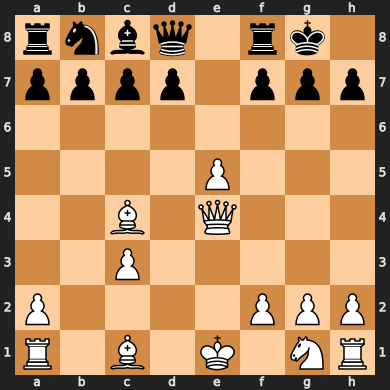

In [25]:
board = chess.Board(topRatedPos)
board

Completely one sided position for black. Black is down a piece and Stockfish gives this a rating of +4.7 at a depth of 26. Let's look at how many games had this exact positon and what was the next move played by black.

In [26]:
(
    games_df
    .query("whiteFENf == @topRatedPos")
    .blackAlgebricNotation
    .value_counts()
)

blackAlgebricNotation
d5     13
c6     12
d6     11
Re8     8
Nc6     8
Qe7     1
Name: count, dtype: int64

Let's look at one game that reached this position from the dataset as a sample.

![ChessUrl](https://images.chesscomfiles.com/uploads/game-gifs/90px/green/neo/0/cc/0/0/bUMwS2xCS0Jrc0JzYnM5emZBIVRDS1RDZEp6c2pzOCFKQw,,.gif "chess")


##### **Importance of This Position**

The position described above is one that frequently arises in my personal experience when playing the Danish Gambit. Its significance is further supported by the dataset, where this exact position occurred in **55 out of 31,802 games**, a notable frequency.  

Despite an evaluation of **+4.7 in favor of White**, this position remains highly relevant. The fact that it occurs so commonly highlights its importance as a critical line to study when preparing for the **Danish Gambit Accepted**. Understanding the key ideas and tactical opportunities in this position can provide players with a significant edge, especially against opponents unfamiliar with the subtleties of this line.  

##### **Key Takeaways**
- **Frequency**: Appearing in approximately **1 in 578 games**, this position is both common and impactful in practical play.  
- **Preparation**: Studying this position in depth equips players with the ability to navigate the resulting complexities effectively, making it an essential line for mastering the Danish Gambit.  


Let's look at the 2nd rated position.

In [27]:
secondRatedPos = list(FENmappings.keys())[list(FENmappings.values()).index(sorted_nodes[1][0])]

In [28]:
secondRatedPos

'rnbqk1nr/pppp1ppp/8/8/4P3/2Q5/PP3PPP/R1B1KBNR b KQkq - 0 6'

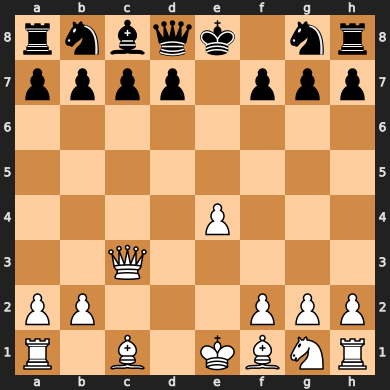

In [29]:
board = chess.Board(secondRatedPos)
board

In [30]:
(
    games_df
    .query("whiteFENf == @secondRatedPos")
    .blackAlgebricNotation
    .value_counts()
)

blackAlgebricNotation
Nf6    212
Qf6     86
f6      62
Nc6     32
d6      19
Qe7     13
Ne7     12
d5       6
h6       2
c6       2
Nh6      1
a6       1
Name: count, dtype: int64

![ChessUrl](https://images.chesscomfiles.com/uploads/game-gifs/90px/green/neo/0/cc/0/0/bUMwS2xCS0Jrc0JzYnM5emRyenNycw,,.gif "chess")


##### **Importance of This Position**

This position represents another commonly encountered line in my games when playing the Danish Gambit. Its prominence is validated by the dataset, where this position appeared in **448 out of 31,802 games**, making it a critical line to study.  

Unlike some of the other positions, this one is more balanced, with an evaluation of **-0.2 in favor of Black** according to Stockfish at depth 49. However, the balance hinges on Black's ability to play **Nf6** as the next move. Any deviation from this (e.g., alternative moves suggested by Stockfish) results in an advantage for White.  

##### **Key Takeaways**
- **Frequency**: Appearing in approximately **1 in 71 games** (448/31,802), this position is highly relevant in practical play.  
- **Evaluation**: Although Stockfish evaluates this position as slightly better for Black (-0.2), this depends on Black finding the precise move **Nf6**. All other moves provide White with an edge.  
- **Preparation**: Understanding the nuances of this position and preparing for likely responses is crucial for players aiming to succeed in the Danish Gambit Accepted.  

Let's look at the 3rd rated position.

In [31]:
thirdRatedPos = list(FENmappings.keys())[list(FENmappings.values()).index(sorted_nodes[2][0])]

In [32]:
thirdRatedPos

'r1b1kb1r/ppp1qpp1/2np3p/3n4/2B1P3/1Q3N2/PP3PPP/R1B2RK1 w kq - 0 10'

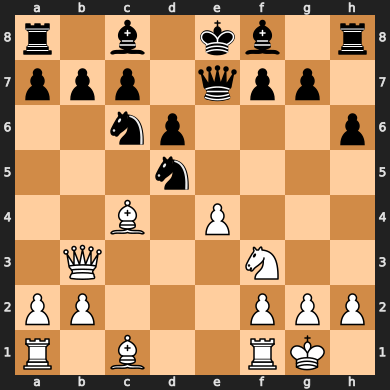

In [33]:
board = chess.Board(thirdRatedPos)
board

In [34]:
(
    games_df
    .pipe(
        lambda df: (
            df
            .assign(
                nextwhitemove = df.whiteAlgebricNotation.shift(-1)
            )
        )
    )
    .query("blackFENf == @thirdRatedPos")
    .nextwhitemove
    .value_counts()
)

nextwhitemove
exd5    10
Bxd5     2
Name: count, dtype: int64

![ChessUrl](https://images.chesscomfiles.com/uploads/game-gifs/90px/green/neo/0/cc/0/0/bUMwS2xCS0Jrc0JzYnNaUmZBNVFndiFUZWczVmRyNzBzSlRK.gif "chess")


##### **Importance of This Position**

This position, evaluated at **+2.8 in favor of White** by Stockfish at depth 28, represents another critical structure in the Danish Gambit. While it is less common in our dataset, appearing in only **12 out of 31,802 games**, it remains significant due to its strategic and tactical importance.  

From personal experience, this structure frequently arises in practical play. Understanding the key ideas and plans associated with this position can help players capitalize on White's advantage and navigate the complexities effectively.  

##### **Key Takeaways**
- **Frequency**: Appearing in approximately **1 in 2,650 games** (12/31,802), this position is less frequent but still relevant.  
- **Evaluation**: Stockfish evaluates this position as strongly favorable for White (+2.8), offering a clear opportunity to press for a win with precise play.  
- **Preparation**: Despite its rarity, studying this position is essential for players seeking to master the Danish Gambit and exploit similar structures during games.  

### Findings

[Back to Table of Contents](#Table-of-Contents)<br>

#### **Analysis of Highly Ranked Positions**

Based on the **PageRank algorithm**, we identified the top-ranked positions (FENs) from our dataset. Below are detailed observations and conclusions derived from the analysis:

---

##### **Observations**  

1. **Most Critical Positions**  
   - The majority of the highly ranked positions occur between **moves 8 to 10**, emphasizing their pivotal role in determining the game's trajectory.  
   - This aligns with my personal experience in the Danish Gambit, where tactical complications typically arise during this phase.  

2. **Top-Ranked vs. Most Frequent Positions**  
   - The **top-ranked positions** differ significantly from the **most frequently encountered positions** in the dataset.  
   - While frequent positions represent common responses, they may not encompass the strategic depth needed to confidently navigate the opening at intermediate to advanced levels.  
   - The PageRank approach ensures that critical positions—those central to game flow—are highlighted, even if they are not the most played.

3. **Common Errors and Key Patterns**  
   - Certain positions showcase recurring mistakes by opponents. For instance:  
     - **Nf6** is critical for Black in several positions to maintain balance. Deviations often lead to significant advantages for White.  
     - Positions like one evaluated at **+4.7 for White** are common in human play, with 59% of players failing to choose the optimal move.  
   - These patterns highlight opportunities for players to capitalize on common errors with proper preparation.  

4. **Rarity vs. Importance**  
   - Some positions, like one evaluated at **+2.8 for White**, appear less frequently (e.g., 12 out of 31,802 games). However, their strategic and tactical relevance remains significant.  
   - Studying such positions equips players to handle less common but highly advantageous scenarios effectively.

---

##### **Conclusions**  

1. **Practical Preparation**  
   - The analysis provides a comprehensive understanding of critical positions in the Danish Gambit, offering actionable insights for players.  
   - By studying these positions, players can gain confidence in their opening repertoire and prepare for a variety of lines encountered during play.

2. **Insights Beyond Common Responses**  
   - Focusing on top-ranked positions ensures preparedness for lines beyond the most common responses, making this methodology particularly valuable for higher-level play.  

3. **Relevance of PageRank**  
   - The PageRank algorithm proves to be an effective tool for identifying important positions, enabling players to prioritize their study on moves that significantly influence the game’s trajectory.  

By integrating these insights into practice, players can build a robust understanding of the Danish Gambit and navigate both frequent and nuanced lines with confidence.  



## Conclusion
[Back to Table of Contents](#Table-of-Contents)<br><br>

The analysis successfully highlights the most critical positions in the Danish Gambit by leveraging the PageRank algorithm. These positions represent pivotal moments in the game, where tactical and strategic decisions significantly influence the trajectory. By studying these key positions, players can enhance their preparation and performance in the Danish Gambit, equipping themselves to navigate both common and complex lines effectively.

#### **Top 5 Critical Positions with Explanations**  

Below are the **top 5 critical positions** identified in the analysis. Each position is presented with its **FEN string**, a **board representation**, and an **explanation** of its significance in the Danish Gambit.  

---

### 1. **Position 1** (Rank 1)  
**FEN**: `rnbq1rk1/pppp1ppp/8/4P3/2B1Q3/2P5/P4PPP/R1B1K1NR b KQ - 0 9`  
**Board Representation**:  

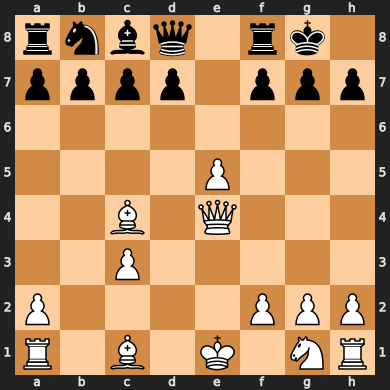

In [35]:
board = chess.Board("rnbq1rk1/pppp1ppp/8/4P3/2B1Q3/2P5/P4PPP/R1B1K1NR b KQ - 0 9")
board

**Explanation**:  
This position emphasizes White’s control of the center and activity of the light-squared bishop and queen. 

### 2. **Position 2** (Rank 2)  
**FEN**: `rnbqk1nr/pppp1ppp/8/8/4P3/2Q5/PP3PPP/R1B1KBNR b KQkq - 0 6`  
**Board Representation**:  

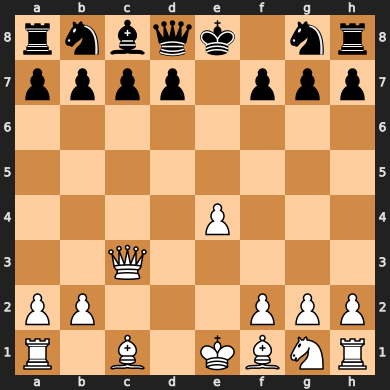

In [36]:
board = chess.Board("rnbqk1nr/pppp1ppp/8/8/4P3/2Q5/PP3PPP/R1B1KBNR b KQkq - 0 6")
board

**Explanation**:  
White has seized an early lead in development, with the queen actively placed on c3. Black needs to counter White's central dominance with precise moves to balance the game.  

### 3. **Position 3** (Rank 3)  
**FEN**: `r1b1kb1r/ppp1qpp1/2np3p/3n4/2B1P3/1Q3N2/PP3PPP/R1B2RK1 w kq - 0 10`  
**Board Representation**:  

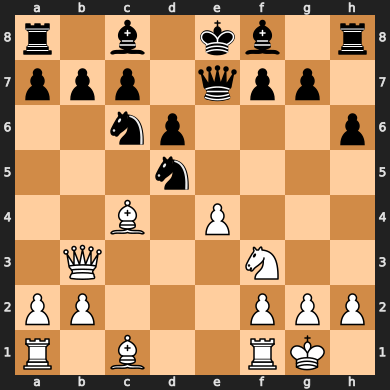

In [37]:
board = chess.Board("r1b1kb1r/ppp1qpp1/2np3p/3n4/2B1P3/1Q3N2/PP3PPP/R1B2RK1 w kq - 0 10")
board

**Explanation**:  
This position represents a critical tactical juncture where both sides have developed their pieces. White’s queen and bishop are well-positioned for attacking chances.  

### 4. **Position 4** (Rank 4)  
**FEN**: `r1bq1rk1/ppp1npp1/2np3p/6NQ/2B1P3/2P5/P4PPP/R1B2RK1 w - - 0 11`  
**Board Representation**:  

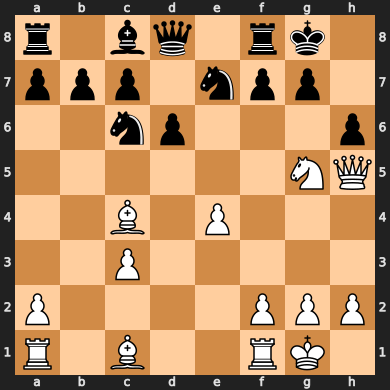

In [38]:
board = chess.Board("r1bq1rk1/ppp1npp1/2np3p/6NQ/2B1P3/2P5/P4PPP/R1B2RK1 w - - 0 11")
board

**Explanation**:  
White’s queen on h5 and knight on g5 create significant pressure on Black’s kingside. Black must neutralize the threats while developing their remaining pieces for counterplay.  

### 5. **Position 5** (Rank 5)  
**FEN**: `r1b2rk1/ppp1qppp/3p1n2/4N1B1/2B1P3/1QP5/P4PPP/R3R1K1 b - - 0 12`  
**Board Representation**:  

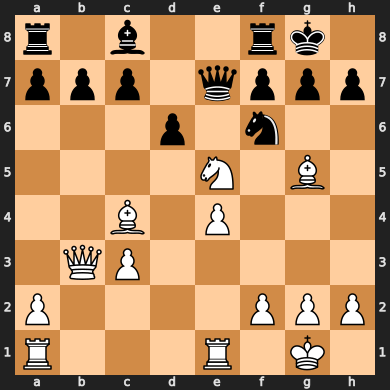

In [39]:
board = chess.Board("r1b2rk1/ppp1qppp/3p1n2/4N1B1/2B1P3/1QP5/P4PPP/R3R1K1 b - - 0 12")
board

**Explanation**:  
White dominates the board with active pieces, while Black faces pressure on the queenside and center. Accurate defense is crucial to maintain balance, making this a key position to understand.  

## Future Analysis
[Back to Table of Contents](#Table-of-Contents)<br>
Future work can explore:
- **Higher-Granularity Insights**: Identifying variations within the critical positions based on player ratings and move evaluations.
- **Machine Learning Models**: Training models to predict opponent responses based on identified critical positions.
- **Outcome Analysis**: Assessing how critical positions correlate with win/loss outcomes to refine preparation strategies.
- **Engine Evaluations**: Incorporating engine evaluations to the analysis to identify poisitons where players commit blunders.
- **Other Openings**: Perform the analysis for other openings.
- **Increase the number of games analysed**: Increasing the total number of games analysed will provide more general critical positons.

---

## Acknowledgments  
[Back to Table of Contents](#Table-of-Contents)  

The study was made possible by:  
- **[pgn-extract](https://www.cs.kent.ac.uk/people/staff/djb/pgn-extract/)**: A powerful tool for parsing and filtering PGN files, essential for preparing the dataset.  
- **[Lichess Open Database](https://database.lichess.org/)**: An invaluable resource providing access to millions of chess games, enabling a comprehensive analysis of real-world play.  
- **[Chess.com GIF Maker](https://www.chess.com/gifs)**: A user-friendly tool that was instrumental in creating visual representations of board positions, enhancing the clarity and appeal of this analysis.  
---

## Appendix ##
[Back to Table of Contents](#Table-of-Contents)

### FEN Notation ###
[Back to Table of Contents](#Table-of-Contents)

Forsyth–Edwards Notation (FEN) is a standard notation used to describe a specific board position in a chess game. It encapsulates all the necessary information to restart a game from a particular position.

For this analysis, FEN comments have been added to the `.pgn` file to encode the position of the board after each move. This was accomplished using the highly efficient **pgn-extract** tool. Below is the sample `.pgn` file with FEN comments added, along with the command to generate it.

#### Command to Add FEN Comments
```bash
pgn-extract --fencomments --output lichessSampleFEN.pgn lichess_sample.pgn
```

Here, `lichess_sample.pgn` contains the original game, and the output file `lichessSampleFEN.pgn` includes FEN comments. Below is the sample output with FEN comments.

---

```plaintext
[Event "Rated Bullet tournament https://lichess.org/tournament/yc1WW2Ox"]
[Site "https://lichess.org/PpwPOZMq"]
[Date "2017.04.01"]
[Round "-"]
[White "Abbot"]
[Black "Costello"]
[Result "0-1"]
[WhiteTitle "FM"]
[WhiteElo "2100"]
[BlackElo "2000"]
[ECO "B30"]
[Opening "Sicilian Defense: Old Sicilian"]
[TimeControl "300+0"]
[UTCDate "2017.04.01"]
[UTCTime "11:32:01"]
[Termination "Time forfeit"]
[WhiteRatingDiff "-4"]
[BlackRatingDiff "+1"]

1. e4 { [%eval 0.17] [%clk 0:00:30] } { rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1 }  
1... c5 { [%eval 0.19] [%clk 0:00:30] } { rnbqkbnr/pp1ppppp/8/2p5/4P3/8/PPPP1PPP/RNBQKBNR w KQkq c6 0 2 }  
2. Nf3 { [%eval 0.25] [%clk 0:00:29] } { rnbqkbnr/pp1ppppp/8/2p5/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2 }  
2... Nc6 { [%eval 0.33] [%clk 0:00:30] } { r1bqkbnr/pp1ppppp/2n5/2p5/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3 }  
3. Bc4 { [%eval -0.13] [%clk 0:00:28] } { r1bqkbnr/pp1ppppp/2n5/2p5/2B1P3/5N2/PPPP1PPP/RNBQK2R b KQkq - 3 3 }  
3... e6 { [%eval -0.04] [%clk 0:00:30] } { r1bqkbnr/pp1p1ppp/2n1p3/2p5/2B1P3/5N2/PPPP1PPP/RNBQK2R w KQkq - 0 4 }  
4. c3 { [%eval -0.4] [%clk 0:00:27] } { r1bqkbnr/pp1p1ppp/2n1p3/2p5/2B1P3/2P2N2/PP1P1PPP/RNBQK2R b KQkq - 0 4 }  
4... b5 $2 { [%eval 1.18] [%clk 0:00:30] } { r1bqkbnr/p2p1ppp/2n1p3/1pp5/2B1P3/2P2N2/PP1P1PPP/RNBQK2R w KQkq b6 0 5 }  
5. Bb3 $6 { [%eval 0.21] [%clk 0:00:26] } { r1bqkbnr/p2p1ppp/2n1p3/1pp5/4P3/1BP2N2/PP1P1PPP/RNBQK2R b KQkq - 1 5 }  
5... c4 { [%eval 0.32] [%clk 0:00:29] } { r1bqkbnr/p2p1ppp/2n1p3/1p6/2p1P3/1BP2N2/PP1P1PPP/RNBQK2R w KQkq - 0 6 }  
6. Bc2 { [%eval 0.2] [%clk 0:00:25] } { r1bqkbnr/p2p1ppp/2n1p3/1p6/2p1P3/2P2N2/PPBP1PPP/RNBQK2R b KQkq - 1 6 }  
6... a5 { [%eval 0.6] [%clk 0:00:29] } { r1bqkbnr/3p1ppp/2n1p3/pp6/2p1P3/2P2N2/PPBP1PPP/RNBQK2R w KQkq a6 0 7 }  
7. d4 { [%eval 0.29] [%clk 0:00:23] } { r1bqkbnr/3p1ppp/2n1p3/pp6/2pPP3/2P2N2/PPB2PPP/RNBQK2R b KQkq d3 0 7 }  
7... cxd3 { [%eval 0.6] [%clk 0:00:27] } { r1bqkbnr/3p1ppp/2n1p3/pp6/4P3/2Pp1N2/PPB2PPP/RNBQK2R w KQkq - 0 8 }  
8. Qxd3 { [%eval 0.12] [%clk 0:00:22] } { r1bqkbnr/3p1ppp/2n1p3/pp6/4P3/2PQ1N2/PPB2PPP/RNB1K2R b KQkq - 0 8 }  
...
```

---

The inclusion of FEN comments facilitates detailed positional analysis of the games and enables sophisticated insights into move sequences and evaluations.